<a href="https://colab.research.google.com/github/Bryan1093/Inteligencia_Artificial/blob/main/Jarras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El problema**

Se tienen dos jarras, una con capacidad de 5 litros y otra con 3. Ninguna de ellas tiene marcas de medición. Tenemos un grifo que permite llenar las jarras de agua.

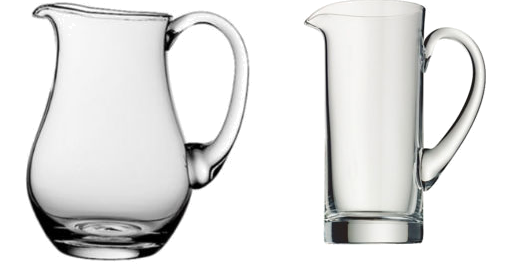

La solución consiste en conseguir que en la jarra de 5 litros hayan exactamente 4 litros de agua, la de 3 litros no tiene ninguna restricción.

**Definición de la clase Nodo:**

Es la estructura básica de cada estado (nodo) en el árbol de búsqueda.
Contiene métodos para establecer hijos, definir el padre, y verificar si el nodo ya fue visitado.

**Definición de la función buscar_solucion_DFS:**

- Esta es la función principal que implementa el algoritmo de búsqueda en profundidad (DFS).
- El flujo es:

 - Inicialización de variables.
 - Bucle de búsqueda donde:
   - Se verifica si el nodo actual cumple la condición de solución.
   - Si no, se generan y agregan los hijos a la frontera de nodos a explorar.

**Código de ejecución principal (if __name__ == '__main__':):**

Define el estado inicial y el estado objetivo (solución).
Llama a la función buscar_solucion_DFS para encontrar el nodo solución.
Reconstruye el camino desde el nodo solución hasta el nodo inicial.
Muestra el resultado.




**Inicialización:** Coloca el nodo inicial en la frontera (estados a explorar).

**Bucle de búsqueda:** Extrae nodos de la frontera, verifica si cumple el objetivo, y expande los posibles movimientos (llenar, vaciar o transferir entre jarras).

**Solución:** Cuando encuentra el objetivo, reconstruye el camino hasta el estado inicial.

Al final, imprime la secuencia de pasos para llegar al estado deseado.

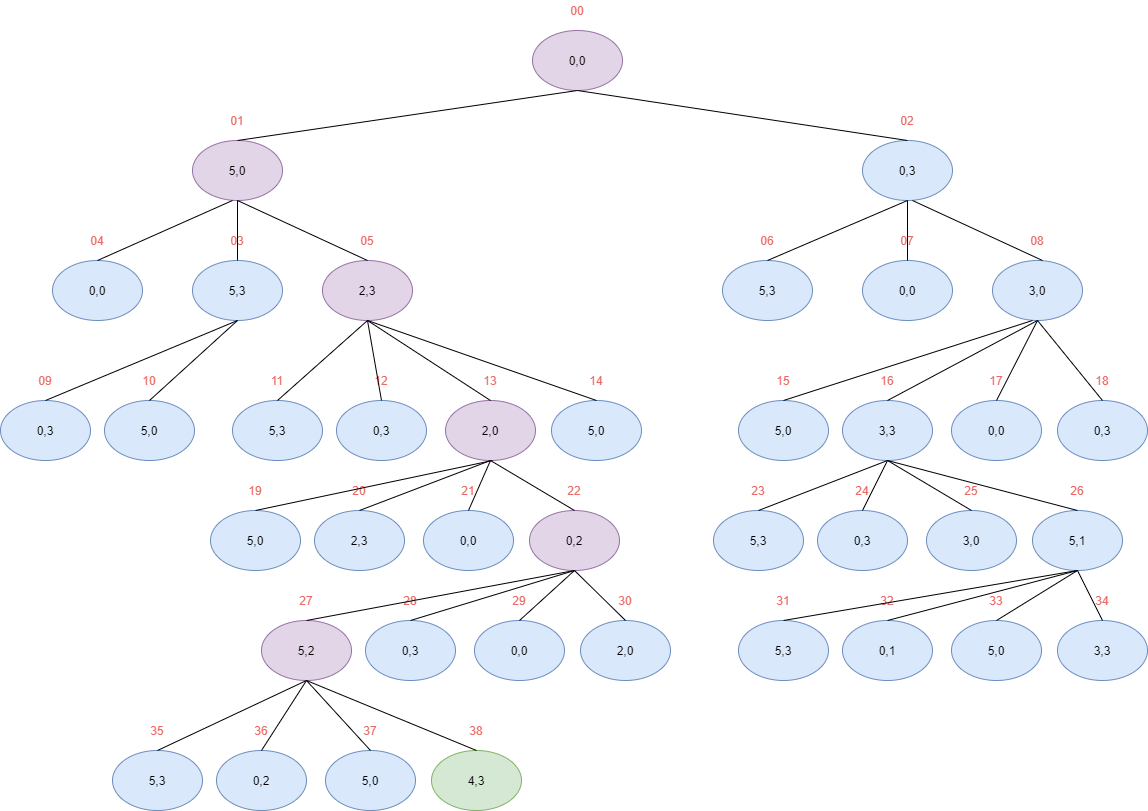

In [3]:
#Busqueda en Amplitud

def buscar_solucion_BFS(estado_inicial, solucion):
    solucionado = False
    nodos_visitados = []
    nodos_frontera = []

    nodoInicial = Nodo(estado_inicial)
    nodos_frontera.append(nodoInicial)

    while (not solucionado) and len(nodos_frontera) != 0:
        nodo = nodos_frontera.pop(0)  # Extraer nodo a visitar
        nodos_visitados.append(nodo)  # Añadir a nodos visitados

        # Solo debemos comprobar que en la jarra grande hayan 4 litros
        if nodo.get_datos()[0] == solucion[0]:
            solucionado = True

            # Devuelvo el último nodo (meta) que tiene un padre, que a su vez tiene otro padre etc y ese sería el camino a la solución
            return nodo
        else:  # Expandir hijos
            dato_nodo = nodo.get_datos()

            # Llenar grande
            hijo = [5, dato_nodo[1]]

            hijo_1 = Nodo(hijo)

            if not hijo_1.en_lista(nodos_visitados) and not hijo_1.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_1)

            # Llenar pequeña
            hijo = [dato_nodo[0], 3]

            hijo_2 = Nodo(hijo)

            if not hijo_2.en_lista(nodos_visitados) and not hijo_2.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_2)

            # Vaciar grande
            hijo = [0, dato_nodo[1]]

            hijo_3 = Nodo(hijo)

            if not hijo_3.en_lista(nodos_visitados) and not hijo_3.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_3)

            # Vaciar pequeña
            hijo = [dato_nodo[0], 0]

            hijo_4 = Nodo(hijo)

            if not hijo_4.en_lista(nodos_visitados) and not hijo_4.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_4)

            # Traspasar grande-pequeña
            actual_grande = dato_nodo[0]
            actual_peque = dato_nodo[1]
            fin_grande = actual_grande
            fin_peque = actual_peque

            puedo_traspasar = 3 - actual_peque

            if puedo_traspasar > 0:
                if actual_grande <= puedo_traspasar:
                    fin_peque = actual_peque + fin_grande
                    fin_grande = 0

                    if fin_peque > 3:
                        fin_peque = 3
                else:
                    fin_peque = puedo_traspasar + actual_peque
                    fin_grande = actual_grande - puedo_traspasar

            hijo = [fin_grande, fin_peque]

            hijo_5 = Nodo(hijo)

            if not hijo_5.en_lista(nodos_visitados) and not hijo_5.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_5)

            # Traspasar pequeña-grande
            actual_grande = dato_nodo[0]
            actual_peque = dato_nodo[1]
            fin_grande = actual_grande
            fin_peque = actual_peque

            puedo_traspasar = 5 - actual_grande

            if puedo_traspasar > 0:
                if actual_peque <= puedo_traspasar:
                    fin_grande = actual_grande + fin_peque
                    fin_peque = 0

                    if fin_grande > 5:
                        fin_grande = 5
                else:
                    fin_grande = puedo_traspasar + actual_grande
                    fin_peque = actual_peque - puedo_traspasar

            hijo = [fin_grande, fin_peque]

            hijo_6 = Nodo(hijo)

            if not hijo_6.en_lista(nodos_visitados) and not hijo_6.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_6)

            nodo.set_hijos([hijo_1, hijo_2, hijo_3, hijo_4, hijo_5, hijo_6])


if __name__ == '__main__':
    estado_inicial = [0, 0]
    solucion = [4, 3]

    nodo_solucion = buscar_solucion_BFS(estado_inicial, solucion)

    # Creo una lista de todos los padres del nodo solución
    resultado = []
    nodo = nodo_solucion

    while nodo.get_padre() != None:
        resultado.append(nodo.get_datos())
        nodo = nodo.get_padre()

    resultado.append(estado_inicial)
    resultado.reverse()

    print(resultado)

[[0, 0], [5, 0], [2, 3], [2, 0], [0, 2], [5, 2], [4, 3]]


__init__: Inicializa el nodo con datos, una lista de hijos (si se proporciona), el nodo padre, y un coste (si se aplica).

**set_hijos:** Establece los nodos hijos y les asigna el nodo actual como su padre.

get_hijos y get_padre: Devuelven los nodos hijos y el nodo padre, respectivamente.

**set_datos y get_datos:** Permiten establecer y obtener los datos almacenados en el nodo.

**set_coste y get_coste:** Permiten establecer y obtener el coste asociado al nodo (útil para algoritmos de búsqueda que consideren el coste de los nodos).

**igual:** Compara el nodo actual con otro nodo, devolviendo True si sus datos son iguales.

**en_lista:** Verifica si el nodo actual está en una lista de nodos, comparando datos de cada nodo en la lista.

**__str__:** Devuelve una representación en forma de cadena de los datos del nodo, útil para depuración e impresión.texto en negrita

In [2]:
class Nodo:
    def __init__(self, datos, hijos=None) -> None:
        self.datos = datos
        self.hijos = None
        self.padre = None
        self.coste = None
        self.set_hijos(hijos)

    def set_hijos(self, hijos) -> None:
        self.hijos = hijos

        if self.hijos != None:
            for h in self.hijos:
                h.padre = self

    def get_hijos(self):
        return self.hijos

    def get_padre(self):
        return self.padre

    def set_padre(self, padre) -> None:
        self.padre = padre

    def set_datos(self, datos) -> None:
        self.datos = datos

    def get_datos(self):
        return self.datos

    def set_coste(self, coste) -> None:
        self.coste = coste

    def get_coste(self):
        return self.coste

    def igual(self, nodo) -> bool:
        if self.get_datos() == nodo.get_datos():
            return True

        return False

    def en_lista(self, lista_nodos) -> bool:
        en_la_lista = False

        for n in lista_nodos:
            if self.igual(n):
                en_la_lista = True

        return en_la_lista

    def __str__(self) -> str:
        return str(self.get_datos())

**Inicialización:**

Define estado_inicial (ambas jarras vacías) y solucion (objetivo: 4 litros en la jarra grande).

Crea un nodo inicial y lo agrega a la frontera de nodos a explorar.
Bucle de búsqueda:

Mientras haya nodos en la frontera, extrae uno y lo marca como visitado.
Si el nodo tiene 4 litros en la jarra grande, ha alcanzado la solución y devuelve el nodo objetivo.

Si no, genera nuevos nodos (hijos) que representan las posibles acciones:
 - Llenar o vaciar cada jarra.
 - Transferir agua entre las jarras grande y pequeña.
 - Agrega estos nodos a la frontera si aún no han sido visitados.

**Reconstrucción de la solución:**

Si encuentra la solución, recorre los nodos padres desde el nodo objetivo hasta el inicial para formar el camino.
Imprime la secuencia de pasos que lleva al estado objetivo.

Este enfoque permite encontrar el camino correcto en problemas de búsqueda donde el estado inicial se transforma gradualmente hasta cumplir una condición.

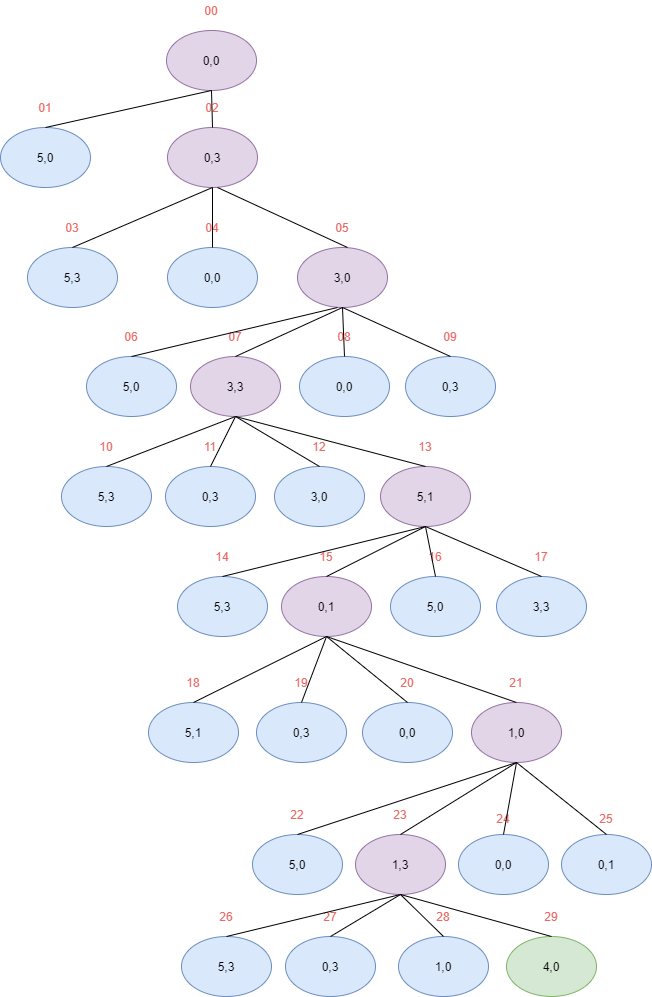

In [4]:
#Busqueda en Profundidad

def buscar_solucion_DFS(estado_inicial, solucion):
    solucionado = False
    nodos_visitados = []
    nodos_frontera = []

    nodoInicial = Nodo(estado_inicial)
    nodos_frontera.append(nodoInicial)

    while (not solucionado) and len(nodos_frontera) != 0:
        nodo = nodos_frontera.pop()  # Extraer nodo a visitar
        nodos_visitados.append(nodo)  # Añadir a nodos visitados

        # Solo debemos comprobar que en la jarra grande hayan 4 litros
        if nodo.get_datos()[0] == solucion[0]:
            solucionado = True

            # Devuelvo el último nodo (meta) que tiene un padre, que a su vez tiene otro padre etc y ese sería el camino a la solución
            return nodo
        else:  # Expandir hijos
            dato_nodo = nodo.get_datos()

            # Llenar grande
            hijo = [5, dato_nodo[1]]

            hijo_1 = Nodo(hijo)

            if not hijo_1.en_lista(nodos_visitados) and not hijo_1.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_1)

            # Llenar pequeña
            hijo = [dato_nodo[0], 3]

            hijo_2 = Nodo(hijo)

            if not hijo_2.en_lista(nodos_visitados) and not hijo_2.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_2)

            # Vaciar grande
            hijo = [0, dato_nodo[1]]

            hijo_3 = Nodo(hijo)

            if not hijo_3.en_lista(nodos_visitados) and not hijo_3.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_3)

            # Vaciar pequeña
            hijo = [dato_nodo[0], 0]

            hijo_4 = Nodo(hijo)

            if not hijo_4.en_lista(nodos_visitados) and not hijo_4.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_4)

            # Traspasar grande-pequeña
            actual_grande = dato_nodo[0]
            actual_peque = dato_nodo[1]
            fin_grande = actual_grande
            fin_peque = actual_peque

            puedo_traspasar = 3 - actual_peque

            if puedo_traspasar > 0:
                if actual_grande <= puedo_traspasar:
                    fin_peque = actual_peque + fin_grande
                    fin_grande = 0

                    if fin_peque > 3:
                        fin_peque = 3
                else:
                    fin_peque = puedo_traspasar + actual_peque
                    fin_grande = actual_grande - puedo_traspasar

            hijo = [fin_grande, fin_peque]

            hijo_5 = Nodo(hijo)

            if not hijo_5.en_lista(nodos_visitados) and not hijo_5.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_5)

            # Traspasar pequeña-grande
            actual_grande = dato_nodo[0]
            actual_peque = dato_nodo[1]
            fin_grande = actual_grande
            fin_peque = actual_peque

            puedo_traspasar = 5 - actual_grande

            if puedo_traspasar > 0:
                if actual_peque <= puedo_traspasar:
                    fin_grande = actual_grande + fin_peque
                    fin_peque = 0

                    if fin_grande > 5:
                        fin_grande = 5
                else:
                    fin_grande = puedo_traspasar + actual_grande
                    fin_peque = actual_peque - puedo_traspasar

            hijo = [fin_grande, fin_peque]

            hijo_6 = Nodo(hijo)

            if not hijo_6.en_lista(nodos_visitados) and not hijo_6.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_6)

            nodo.set_hijos([hijo_1, hijo_2, hijo_3, hijo_4, hijo_5, hijo_6])


if __name__ == '__main__':
    estado_inicial = [0, 0]
    solucion = [4, 3]

    nodo_solucion = buscar_solucion_DFS(estado_inicial, solucion)

    # Creo una lista de todos los padres del nodo solución
    resultado = []
    nodo = nodo_solucion

    while nodo.get_padre() != None:
        resultado.append(nodo.get_datos())
        nodo = nodo.get_padre()

    resultado.append(estado_inicial)
    resultado.reverse()

    print(resultado)

[[0, 0], [0, 3], [3, 0], [3, 3], [5, 1], [0, 1], [1, 0], [1, 3], [4, 0]]
